In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
%load_ext autoreload
%autoreload 1
%aimport gpe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def v_trap(r):
    return 0.5 * r**2.

i =  0 mu = +1.0000
i =  1 mu = +0.3643
i =  2 mu = -1.0093
i =  3 mu = -4.3186
i =  4 mu = -13.0963
i =  5 mu = -26.3703


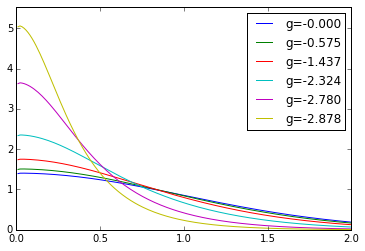

In [75]:
n_vals = np.array([0.0, 0.3663, 0.9147, 1.4798, 1.7695, 1.8319])
n_particles = 2.
g_vals = -n_vals * np.pi / n_particles
for i, g in enumerate(g_vals):
    p = gpe.GPESolver(v_trap=v_trap, g=g, N=n_particles, npts=500, R=6.0, dim=2, lam=0.)
    if i==0:
        y, mu = p.solve()
    else:
        y, mu = p.solve(xin=y)
    psi = p.get_psi(y)
    plt.plot(p.basis.x, p.get_psi(y), label=r'g={g:+5.3f}'.format(g=g))
    print 'i = {i:2d}'.format(i=i), 'mu = {mu:+6.4f}'.format(mu=mu)
    
plt.axis(xmin=0, xmax=2, ymin=0, ymax=p.get_psi(y)[0] + 0.5)
plt.legend();

i =  0 mu = +1.0000
i =  1 mu = +1.5219
i =  2 mu = +2.1718
i =  3 mu = +2.7340
i =  4 mu = +2.9922
i =  5 mu = +3.0456


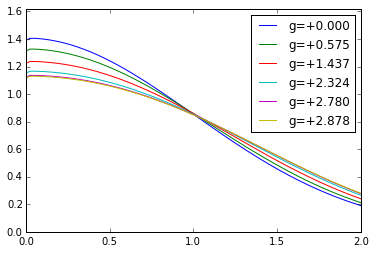

In [76]:
n_vals = np.array([0.0, 0.3663, 0.9147, 1.4798, 1.7695, 1.8319])
n_particles = 2.
g_vals = n_vals * np.pi / n_particles
for i, g in enumerate(g_vals):
    p = gpe.GPESolver(v_trap=v_trap, g=g, N=n_particles, npts=500, R=6.0, dim=2, lam=0.)
    if i==0:
        y, mu = p.solve()
    else:
        y, mu = p.solve(xin=y)
    psi = p.get_psi(y)
    plt.plot(p.basis.x, p.get_psi(y), label=r'g={g:+5.3f}'.format(g=g))
    print 'i = {i:2d}'.format(i=i), 'mu = {mu:+6.4f}'.format(mu=mu)
    
plt.axis(xmin=0, xmax=2, ymin=0, ymax=p.get_psi(y)[0] + 0.5)
plt.legend();